# Sanity Checks on Kitaev's Honeycomb Model

In [11]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl");

LoadError: LoadError: invalid redefinition of constant VertexSquareLattice
in expression starting at /Users/jovanjovanovic/Code/Subsystem-Code-Physics/Toric_Code/AdditionalStructure/NewTypes.jl:3

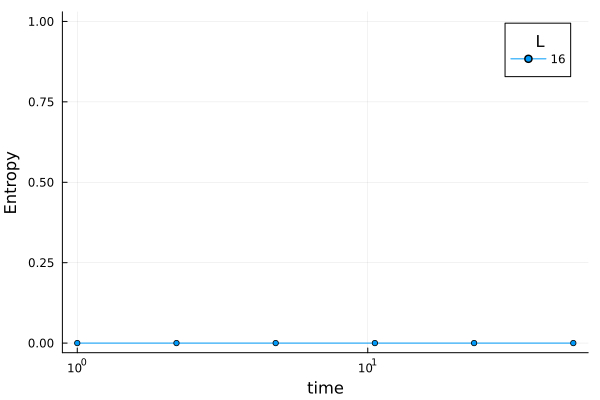

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0

In [12]:
# Geometry and other useful constant are packed in this struct, EdgeSquareLattice and VertexSquareLattice

subsystem = 4
system = Init_VertexHoneyLattice(subsystem);

# Unwrap the main function to be run interactively

p_x = 1/3
p_y = 1/3
p_z = 1/3
stab_distro = Categorical([p_x, p_y, p_z]) # In this case we condense e particles!


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure)) # times at which to measure stuff
simulation = SimulationTime(nt, measure_ts)
L = system.L
nbits = system.nbits

number_of_experiments = 10
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_PURE!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> kitaev_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

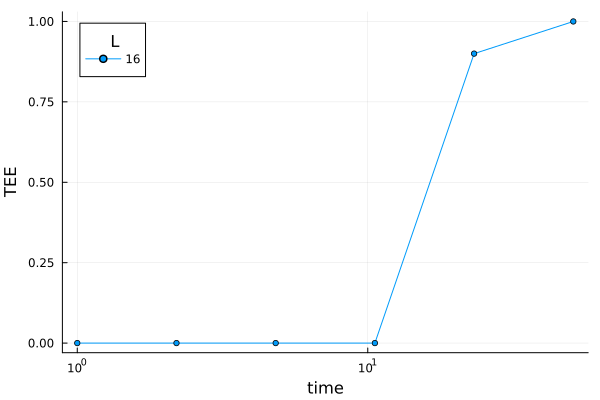

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.9  1.0

In [13]:
number_of_experiments = 10
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEE!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> kitaev_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEE",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

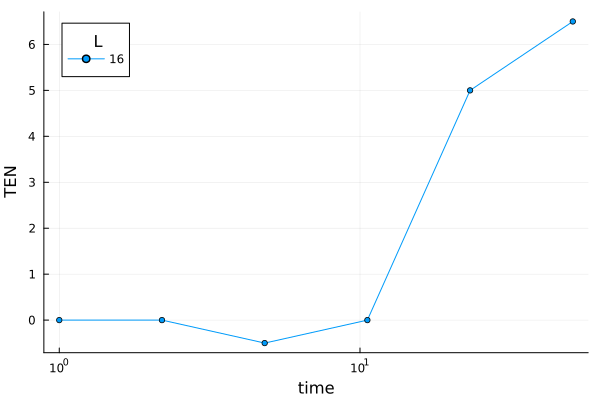

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  -0.5  0.0  5.0  6.5

In [15]:
number_of_experiments = 1
Observables_t = zeros(nmeasure, number_of_experiments)
for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEN!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> kitaev_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEN",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'